In [1]:
import d2l
import torch

In [2]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

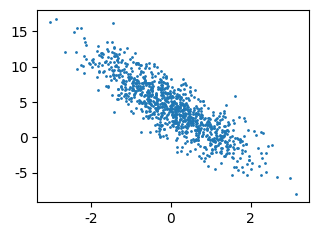

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [4]:
batch_size = 10

for X, y in d2l.data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2546,  0.7132],
        [ 0.2508, -0.5611],
        [ 0.7639, -0.3107],
        [-0.3481, -0.8967],
        [ 0.5787, -1.1335],
        [-0.8647,  0.9699],
        [-1.2656, -2.3492],
        [ 1.7261,  1.2305],
        [ 0.9502,  1.2008],
        [ 0.8880, -0.0614]]) 
 tensor([[ 1.2614],
        [ 6.6138],
        [ 6.7881],
        [ 6.5337],
        [ 9.2065],
        [-0.8372],
        [ 9.6604],
        [ 3.4547],
        [ 2.0355],
        [ 6.1928]])


In [5]:
#初始化模型参数
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
#训练
lr = 0.03
num_epochs = 3
net = d2l.linreg
loss = d2l.squared_loss

for epoch in range(num_epochs):
    for X, y in d2l.data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        d2l.sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.037699
epoch 2, loss 0.000155
epoch 3, loss 0.000051


In [8]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0007, -0.0011], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0006], grad_fn=<RsubBackward1>)
